## Data are ready to be studied

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [5]:
#Loading of the dataset for the study
DfLabelledTimeSeriesCleaned=pd.read_parquet('F:\Data_BachelorHES/5.Dataset_preparation/CNC_Labelled_Data_Cleaned.parquet', engine='pyarrow')

In [6]:
DfLabelledTimeSeriesCleaned.describe()

,frame,frame_time_ms,frame_duration_ms,Data_points,Op_Nb
count,55117.000000,5.511700e+04,55117.000000,55117.000000,55117.000000
mean,147755.000000,4.926291e+06,166.702248,8335.112397,351041.149010
std,79555.258652,2.652447e+06,0.710134,35.506719,231852.309527
min,9965.000000,3.322456e+05,33.340000,1667.000000,3380.000000
25%,78860.000000,2.629278e+06,166.700000,8335.000000,219610.000000
50%,147755.000000,4.926276e+06,166.700000,8335.000000,233600.000000
75%,216650.000000,7.223308e+06,166.720000,8336.000000,593130.000000
max,285545.000000,9.520340e+06,200.040000,10002.000000,765000.000000


In [45]:
print(DfLabelledTimeSeriesCleaned.loc[DfLabelledTimeSeriesCleaned['frame_duration_ms'] > 166.72, 'frame'])

952       14725
28432    152125
Name: frame, dtype: int64


In [8]:
progLineCount=DfLabelledTimeSeriesCleaned['Label_Program_Line'].value_counts()
opNameCount=DfLabelledTimeSeriesCleaned['Label_Op_Name'].value_counts()
toolNameCount=DfLabelledTimeSeriesCleaned['Label_Tool_Name'].value_counts()
print(f'Number of program lines represented: {len(progLineCount)}, on : {np.sum(progLineCount)} observations \n10 biggest program lines : \n {progLineCount[:10]}')

Number of program lines represented: 9660, on : 55117 observations 
10 biggest program lines : 
 Label_Program_Line
N236840 G01 G40 X60.994 Y-26.053     349
N240060 G00 Z10.                     347
N243470 G00 Z10.                     347
N243270 G00 Z10.                     347
N237050 G00 Z10.                     347
N230630 G00 Z10.                     346
N233830 G01 G40 X-165.047 Y26.053    346
N227420 G00 Z10.                     345
N227090 X53.969 Y-25.5 I13.005 J0    247
N217250 G90 M01                      225
Name: count, dtype: int64


In [9]:
print(f'Number of operations represented: {len(opNameCount)}, on : {np.sum(opNameCount)} observations \n10 first Operations  : \n {opNameCount[:10]}')

Number of operations represented: 114, on : 55117 observations 
10 first Operations  : 
 Label_Op_Name
(FIN 26H7)                 6252
(FIN 25H8)                 4274
(FIN CHAMBRAGE D10)        2499
(EB + FIN RAINURE R2 B)    2433
(EB + FIN RAINURE R2 A)    2403
(PERCAGE M4 A)             2222
(PERCAGE M6)               1734
(PERCAGE M4 B)             1724
(EB CHAMBRAGE D10)         1603
(PERCAGE M4 E)             1565
Name: count, dtype: int64


In [10]:
print(f'Number of tools represented: {len(toolNameCount)}, on : {np.sum(toolNameCount)} observations \n10 biggest program lines : \n {toolNameCount[:10]}')

Number of tools represented: 13, on : 55117 observations 
10 biggest program lines : 
 Label_Tool_Name
T02 M06 (VHM 309-12)       21917
T03 M06 (VHM 309-6)         7134
T08 M06 (MECHE3.7 MD)       6710
T06 M06 (VHM 309-3)         6506
T23 M06 (CHANF8)            5243
T09 M06 (MECHE4.6 MD)       1979
T10 M06 (MECHE5.5 MD)       1722
T24 M06 (FRSURF50X5)        1355
T14 M06 (MECHE5.3)          1321
T19 M06 (MECHE MD D4.8)      485
Name: count, dtype: int64


In [11]:
for idx_num, (idx_text, valeur) in enumerate(progLineCount.items()):
    if valeur<30:
        print(idx_num, idx_text, valeur)
        break

333 N223770 G98 G83 Z-17.056 R2. Q2. F1670. 29


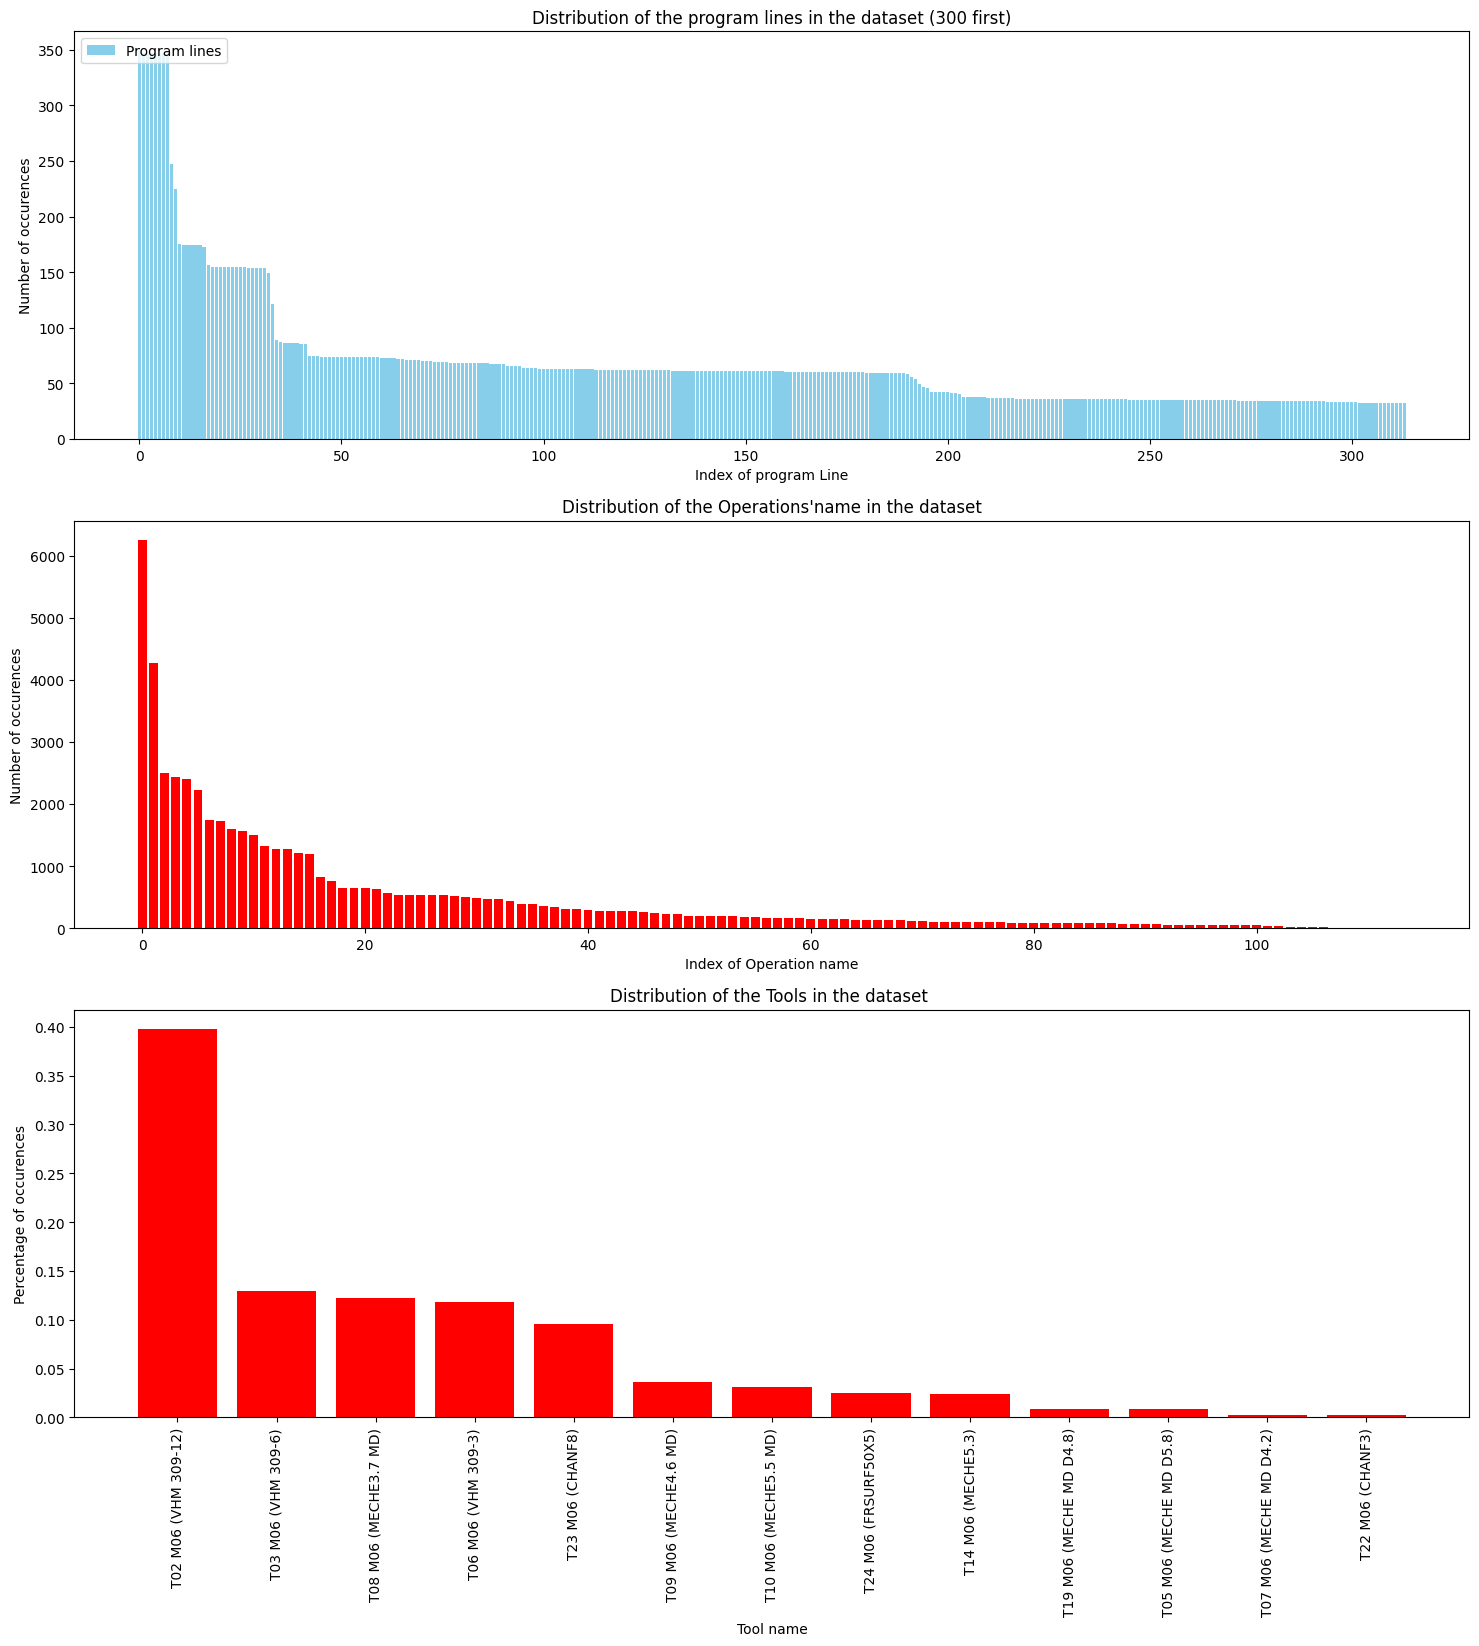

In [36]:

plt.figure(figsize=(18,18))
plt.subplot(3,1,1)
x=np.arange(len(progLineCount[:314]))
plt.bar(x, progLineCount[:314], label="Program lines", color="skyblue", edgecolor=None)
plt.title("Distribution of the program lines in the dataset (300 first)")
plt.xlabel('Index of program Line')
plt.ylabel('Number of occurences')
plt.legend(loc='upper left')

plt.subplot(3,1,2)
x=np.arange(len(opNameCount))
plt.bar(x, opNameCount, label="Smoothed Values", color='red')
plt.title("Distribution of the Operations'name in the dataset")
plt.xlabel('Index of Operation name')
plt.ylabel('Number of occurences')

plt.subplot(3,1,3)
x=np.arange(len(toolNameCount))
plt.bar(toolNameCount.index.tolist(), toolNameCount/toolNameCount.sum(), label="Occurences of Tools", color='red')
plt.xticks(rotation=90)
plt.title("Distribution of the Tools in the dataset ")
plt.xlabel('Tool name')
plt.ylabel('Percentage of occurences')
plt.show()



del x

## Distribution of the labels
Tools : During the measurements 13 tools were used. We can see that tool T02 is the most used tool in the dataset. We will then have a "bias" toward that tool.
Operations : The dataset contains 114 different operations. The most used operation is "FIN 26H7".
Program lines : The dataset contains 9937 different program lines (Classes). The most used program line is "N230500 X-158.021 Y25.5 I-13.005 J0".
We can tell that labels of the dataet have an imbalanced distribution. At first, to avoid overfitting of the data, we will take the labels of the tools as the target variable. ProgLine and Operation name will be left aside for the moment.

We now need to prepare the data for the study. We will first split the data into training and testing sets. We will then investigate the distribution of the labels in the training set. In order to split the data, we will investigate the following techniques:
    - Visualize the temporal distribution of the labels
    - Cross-Validation with temporal blocs with each class represented in each fold
    - Stratified Cross-Validation on time series
    

Since labels of the dataset are imbalanced, we will investigate the following techniques on the training set :
SMOTE-Tomek, Undersampling, Data augmentation



In [22]:
# Tracer la répartition des classes dans le temps
 # Ajout d'un index temporel si non présent
def rep_classes_time(labelled_time_series, label_name, show_legend=True, obs_count=None):
    if obs_count is not None:
        labelled_time_series= labelled_time_series[:obs_count]
    y=[]        
    plt.figure(figsize=(12, 6))
    for label in labelled_time_series[label_name].unique():
        class_data = labelled_time_series[labelled_time_series[label_name] == label]
        plt.plot(class_data['frame_time_ms']/1000, [label] * len(class_data), '.', label=f"Class {label}")

    if show_legend:
        plt.legend(loc="lower right")
       
 
    plt.title(f"Repartion of classes {label_name} over time")
    plt.xlabel("Time [s]")
    plt.ylabel("Class")
    plt.show()
    return

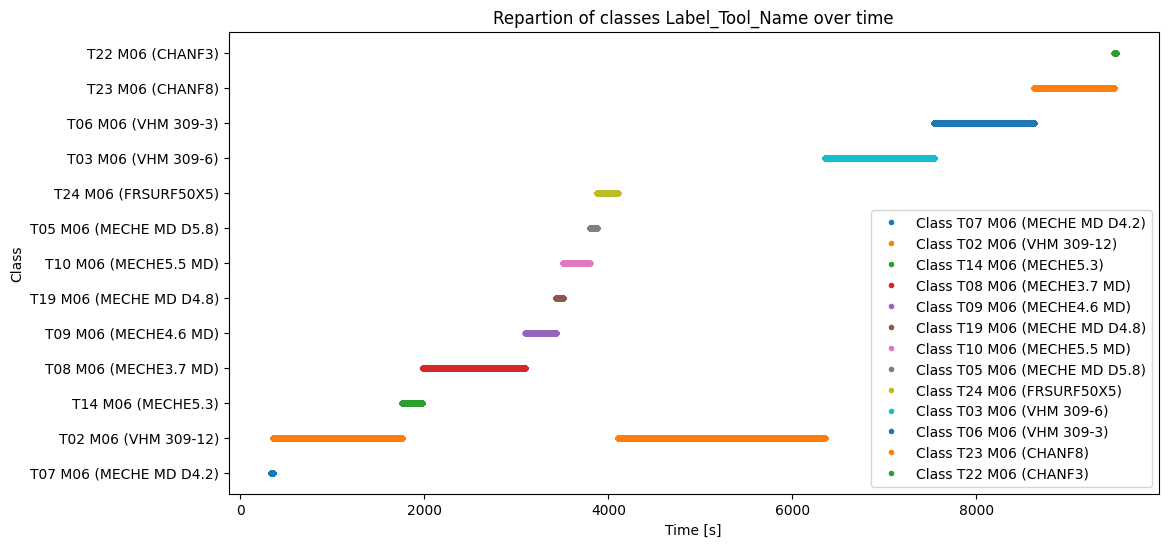

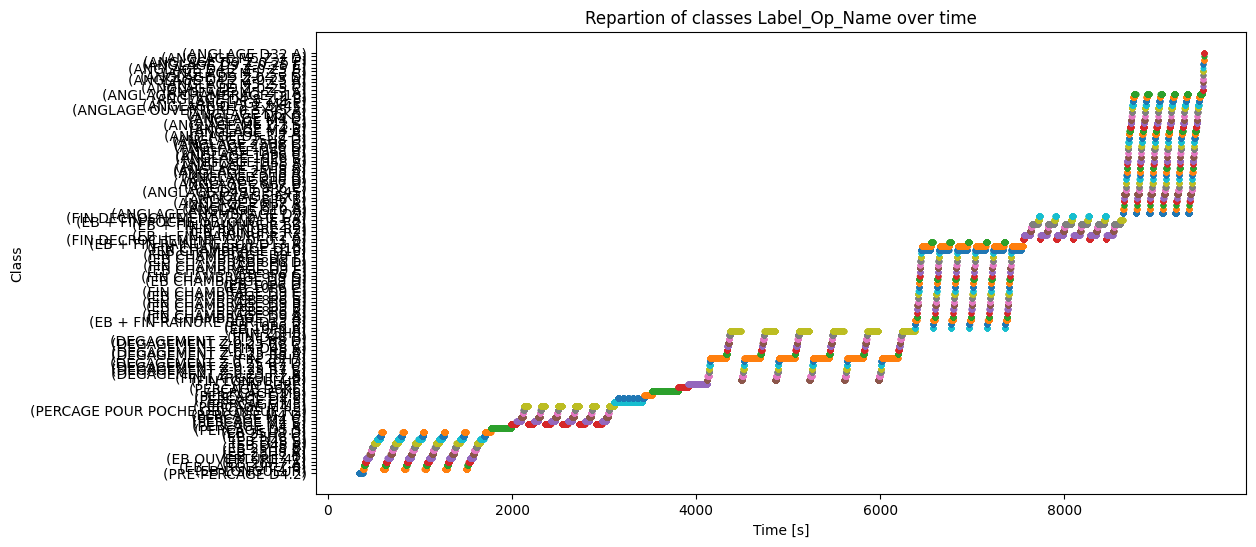

In [24]:
rep_classes_time(DfLabelledTimeSeriesCleaned, 'Label_Tool_Name')
rep_classes_time(DfLabelledTimeSeriesCleaned, 'Label_Op_Name', show_legend=False)

Based on the repartition of classes over time we will adopt one of the two following strategies:
   - Cross-Validation with temporal blocs with each class represented in each fold: take blocs of time and split them into train and test sets wit first samples as train and last samples as test. Temporality is kept but classes can be imbalanced in each fold.

    - Stratified Cross-Validation on time series: For each class and time separate a portion for train and a portion for test (80/20). Temporality is not kept, classes are balanced in each fold.
    
Before going to the train / test separtion, we will investigate in more details the measurements of : sound, acceleration X, Y and Z. 

## Look at condensed labels distribution

In [26]:
import numpy as np

newLabels = ['VHM', 'CHANF', 'MECHE', 'MECHMD', 'FRSURF']
myNpArr = np.zeros(len(newLabels))
for index, row in toolNameCount.items():
    if 'VHM' in index:
        myNpArr[0] += row
    if 'CHANF' in index:
        myNpArr[1] += row
    if ('MECHE' in index) and ('MD' in index):
        myNpArr[2] += row
    if ('MECHE' in index) and (not 'MD' in index):
        myNpArr[3] += row
    if ('FRSURF' in index):
        myNpArr[4] += row
mySeriesCondensedLabels = pd.Series(myNpArr, index=newLabels)
del myNpArr, newLabels, index, row

Nb of samples : 55117.0


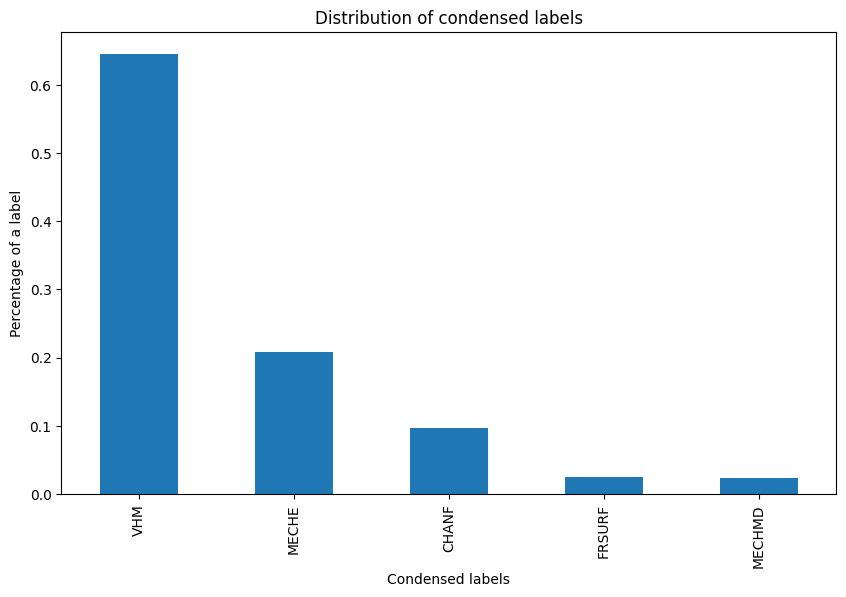

In [27]:
#Plot mySeriesCondensedLabels
import matplotlib.pyplot as plt

total = mySeriesCondensedLabels.sum()
print(f"Nb of samples : {total}")
mySeriesCondensedLabels = mySeriesCondensedLabels / total
mySeriesCondensedLabels.sort_values(ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))
mySeriesCondensedLabels.plot(kind='bar', ax=ax)
ax.set_title("Distribution of condensed labels")
ax.set_ylabel("Percentage of a label")
ax.set_xlabel("Condensed labels")
plt.show()
mySeriesCondensedLabels = mySeriesCondensedLabels * total

del total, ax, fig

In [42]:
toolNames=toolNameCount.index
for i in toolNames:
    print(i)

T02 M06 (VHM 309-12)
T03 M06 (VHM 309-6)
T08 M06 (MECHE3.7 MD)
T06 M06 (VHM 309-3)
T23 M06 (CHANF8)
T09 M06 (MECHE4.6 MD)
T10 M06 (MECHE5.5 MD)
T24 M06 (FRSURF50X5)
T14 M06 (MECHE5.3)
T19 M06 (MECHE MD D4.8)
T05 M06 (MECHE MD D5.8)
T07 M06 (MECHE MD D4.2)
T22 M06 (CHANF3)
